
Input data
```
# This is formatted as code
```



In [ ]:
training=[[0.90,0.87,1],[1.31,0.75,0],[2.48,1.14,0],[0.41,1.87,0],[2.45,0.52,0],[2.54,2.97,1],[0.07,0.09,1],[1.32,1.96,0],[0.94,0.34,1],[1.75,2.21,0]]
testing=[[1.81,1.02,0],[2.36,1.60,0],[2.17,2.08,1],[2.85,2.91,1],[1.05,1.93,0],[2.32,1.73,0],[1.86,1.31,0],[1.45,2.19,0],[0.28,0.71,1],[2.49,1.52,0]]

for i in range(10):
  if len(training[i])!=3:
    print(i)
    print('training')
  elif len(testing[i])!=3:
    print(i)
    print('testing')



In [ ]:
import numpy as np

In [ ]:

class perceptron(object):
  def __init__(self, init_weights, bias):
    # initial weights in initial weight vector
    self.weights = init_weights
    self.bias= bias # initial bias value
    self.delta = 0 # Initial delta value
    self.vector_length= len(self.weights)
    self.activity=0 # Initial activity value
    self.activation=0 # Initial activation value
    #self.weight_delta=0 # initial weight change
    self.eta = 1
    self.bigE = 0
    self.input_vector=[]
    #self.new_weights=[]

  def calc_activity(self, input_vector):
    input=input_vector
    A=0
    for i in range(0, self.vector_length): #calc each term
      A+=input[i]*self.weights[i]
    A+=self.bias
    self.activity = A # Returns it automatically to the self.activity value above

  def calc_activation(self,input_vector):
    self.calc_activity(input_vector)
    self.activation=1/(1.0 + np.exp(-1*self.activity))
    self.input_vector=input_vector

  def get_activation(self):
    return(self.activation)

  def set_eta(self,eta):
    self.eta=eta

  def get_delta(self):
    return(self.delta)

  def calc_delta(self,d):
    y=self.activation
    error=d-y
    delta=error*y*(1-y)
    print(f'Big E Error= {1/2*(error**2)}')
    bige=1/2*(error**2)
    self.bigE=bige
    self.delta=delta

  def weight_update(self):
    new_weights=[]
    for i in range(len(self.input_vector)):
      new_weights.append(self.weights[i]+(self.eta*self.delta*self.input_vector[i]))
    #print(new_weights)
    self.weights=new_weights

  def print_bigE(self):
    return self.bigE

  def bias_update(self):
    newbias=self.bias + (self.eta*self.delta*1)
    self.bias=newbias

In [ ]:
class hiddenlayerperceptron(object):
  def __init__(self, init_weights, bias):
    # initial weights in initial weight vector
    self.weights = init_weights
    self.bias= bias # initial bias value
    self.delta = 0 # Initial delta value
    self.vector_length= len(self.weights)
    self.activity=0 # Initial activity value
    self.activation=0 # Initial activation value
    #self.weight_delta=0 # initial weight change
    self.eta = 1
    self.input_vector=[]
    #self.new_weights=[]

  def calc_activity(self, input_vector):
    input=input_vector
    A=0 # initial activity value
    for i in range(0, self.vector_length): #calc each term
      A+=input[i]*self.weights[i]
      #print(A)
    A+=self.bias
    self.activity = A # Returns it automatically to the self.activity value above

  def calc_activation(self,input_vector):
    self.calc_activity(input_vector)
    self.activation=1/(1.0 + np.exp(-1*self.activity))
    self.input_vector=input_vector

  def get_activation(self):
    return(self.activation)

  def set_eta(self,eta):
    self.eta=eta

  def get_delta(self):
    return(self.delta)

  def calc_delta(self,deltak_vector,weightk_vector):
    y=self.activation
    sum_vector=np.sum(np.dot(np.array(deltak_vector),np.array(weightk_vector)))
    delta=sum_vector*y*(1-y)
    self.delta=delta

  def weight_update(self):
    new_weights=[]
    for i in range(len(self.input_vector)):
      new_weights.append(self.weights[i]+(self.eta*self.delta*self.input_vector[i]))
   #print(new_weights)
    self.weights=new_weights

  def bias_update(self):
    newbias=self.bias + (self.eta*self.delta*1)
    self.bias=newbias

In [ ]:
# FROM CLASS NOTES + MY OWN CODE
class NodeLayer(object):

  def __init__(self, outputflag, num_nodes, num_inputs,init_weights, bias,is_outputlayer,eta):
    # initial weights in initial weight vector
    self.layer=[]
    self.num_inputs=num_inputs
    self.outputflag=outputflag
    self.weights = init_weights
    self.layer_weights=init_weights
    self.activation_vector=[]
    self.bias=bias
    self.delta_vector=[]
    self.eta=eta
    self.bigerror=0

    #self.weight_delta=0 # initial weight change
    #self.eta = 1
    #self.input_vector=[]

    if is_outputlayer==True:
      for i in range(num_nodes):
        # Determine perceptron weight vectors by slicing
        j=i*num_inputs
        perceptron_weights=init_weights[j:j+num_inputs]
          # 2 to 4 for the second slice
        a=perceptron(perceptron_weights,0)
        a.set_eta(self.eta)
        self.layer.append(perceptron(perceptron_weights,self.bias[i]))

    else:
      for i in range(num_nodes):
        # Determine perceptron weight vectors by slicing
        j=i*num_inputs
        perceptron_weights=init_weights[j:j+num_inputs]
        # 2 to 4 for the second slice
        a=hiddenlayerperceptron(perceptron_weights,self.bias[i])
        a.set_eta(self.eta)
        self.layer.append(a)




    if outputflag==True:
      self.littleE_vector= np.zeros(num_nodes, dtype=float)

    self.output_vector=np.zeros(num_nodes,dtype=float)
  def printlayer(self):
    print(self.layer)
  #print(self.layer)

  def calc_activation_vector(self,input_vector):
    activation_vector=[]
    for node in self.layer:
      print(f'Weight Values for node: {node.weights}')
      node.calc_activity(input_vector)
      print(f'Activity value for node: {node.activity}')
      node.calc_activation(input_vector)
      activation_vector.append(node.activation)
    self.activation_vector=activation_vector

  def calc_big_error(self, output_vector):
    bigerrors=[]
    for i in range(len(self.layer)):
      self.layer[i].calc_delta(output_vector[i])
      bigERROR=self.layer[i].print_bigE()
      bigerrors.append(bigERROR)
    self.bigerror=bigerrors[0]

  def calc_delta_vector_ol(self,output_vector):
    new_delta_vector=[]
    bigerrors=[]
    if self.outputflag==True:
      print('works')
      for i in range(len(self.layer)):
        self.layer[i].calc_delta(output_vector[i])
        bigERROR=self.layer[i].print_bigE()
        bigerrors.append(bigERROR)
        #self.layer[i].weight_update()
        print(f'Node weights: {self.layer[i].weights}')
        new_delta_vector.append(self.layer[i].delta)
    self.delta_vector=new_delta_vector
    self.bigerror=bigerrors[0]



  def calc_delta_vector_hl(self,deltak,weightjk):
    new_delta_vector=[]
    output_node=len(deltak)
    input_node=len(self.layer)
    for i in range(len(self.layer)):
      wjk_node=[]
      # Going node by node


      for j in range(output_node):
        wjk_node.append(weightjk[i+j*output_node])
      print(f'Wjk Vector: {wjk_node}')
      self.layer[i].calc_delta(deltak,wjk_node)
      print(f' Delta Value for node in layer{self.layer[i].delta}')

      #self.layer[i].calc_delta(deltak,weightkj)
      #self.layer[i].weight_update
      new_delta_vector.append(self.layer[i].delta)
    self.delta_vector=new_delta_vector


  def update_layer_weights(self):
    update_layer_weights=[]
    for node in self.layer:
      node.weight_update()
      node.bias_update()
      newbias=node.bias
      update_layer_weights+=node.weights
    self.layer_weights=update_layer_weights
    self.bias=newbias
    print(self.layer_weights)








Different Learning Rates

In [ ]:
lr=[0.01,0.05,0.1,0.5]
for i in range(len(lr)):
  hl=NodeLayer(False,2,2,[0.30,0.30,0.30,0.30],[0,0],False,lr[i])
  ol=NodeLayer(True,1,2,[0.8,0.8],[0],True,lr[i])
  lr=[0.01,0.05,0.1,0.5]
  hl.calc_activation_vector([1,1])
  print(hl.activation_vector)

  #ol.layer_weights

  #ol.printlayer()

  ol.calc_activation_vector(hl.activation_vector)

  """ALWAYS REMEMBER THAT LAYER.WEIGHTS IS THE INITIAL WEIGHT VECTOR"""

  print(ol.activation_vector)

  ol.calc_delta_vector_ol([0.9])

  print(ol.delta_vector)

  ol.layer_weights

  hl.calc_delta_vector_hl(ol.delta_vector,ol.layer_weights)

  print(hl.delta_vector)

  ol.update_layer_weights()
  hl.update_layer_weights()
  print('End of epoch')

Weight Values for node: [0.3, 0.3]
Activity value for node: 0.6
Weight Values for node: [0.3, 0.3]
Activity value for node: 0.6
[0.6456563062257954, 0.6456563062257954]
Weight Values for node: [0.8, 0.8]
Activity value for node: 1.0330500899612727
[0.7375067919437424]
works
Big E Error= 0.01320202133220712
Node weights: [0.8, 0.8]
[0.03145714525839961]
Wjk Vector: [0.8]
 Delta Value for node in layer0.005757519267902156
Wjk Vector: [0.8]
 Delta Value for node in layer0.005757519267902156
[0.005757519267902156, 0.005757519267902156]
[0.8203105042119466, 0.8203105042119466]
[0.300057575192679, 0.300057575192679, 0.300057575192679, 0.300057575192679]
End of epoch
Weight Values for node: [0.3, 0.3]
Activity value for node: 0.6
Weight Values for node: [0.3, 0.3]
Activity value for node: 0.6
[0.6456563062257954, 0.6456563062257954]
Weight Values for node: [0.8, 0.8]
Activity value for node: 1.0330500899612727
[0.7375067919437424]
works
Big E Error= 0.01320202133220712
Node weights: [0.8, 0.8

Different Node Layers:

In [ ]:
#Nodes with 3 layers


hl=NodeLayer(False,3,2,[0.20,0.20,0.20,0.20,0.20,0.20],[0,0,0],False,1)
ol=NodeLayer(True,1,3,[0.53,0.53,0.53],[0],True,1)
hl.calc_activation_vector([1,1])
print(hl.activation_vector)

#ol.layer_weights

#ol.printlayer()

ol.calc_activation_vector(hl.activation_vector)

"""ALWAYS REMEMBER THAT LAYER.WEIGHTS IS THE INITIAL WEIGHT VECTOR"""

print(ol.activation_vector)

ol.calc_delta_vector_ol([0.9])

print(ol.delta_vector)
print(ol.bigerror)

ol.layer_weights

hl.calc_delta_vector_hl(ol.delta_vector,ol.layer_weights)

print(hl.delta_vector)

ol.update_layer_weights()
hl.update_layer_weights()
print('End of epoch')

hl.calc_activation_vector([1,1])
print(hl.activation_vector)

#ol.layer_weights

#ol.printlayer()

ol.calc_activation_vector(hl.activation_vector)


"""ALWAYS REMEMBER THAT LAYER.WEIGHTS IS THE INITIAL WEIGHT VECTOR"""

print(ol.activation_vector)

ol.calc_delta_vector_ol([0.9])


Weight Values for node: [0.2, 0.2]
Activity value for node: 0.4
Weight Values for node: [0.2, 0.2]
Activity value for node: 0.4
Weight Values for node: [0.2, 0.2]
Activity value for node: 0.4
[0.598687660112452, 0.598687660112452, 0.598687660112452]
Weight Values for node: [0.53, 0.53, 0.53]
Activity value for node: 0.9519133795787988
[0.7214998112656048]
works
Big E Error= 0.015931158689107355
Node weights: [0.53, 0.53, 0.53]
[0.03586744122314081]
0.015931158689107355
Wjk Vector: [0.53]
 Delta Value for node in layer0.004567295233339506
Wjk Vector: [0.53]
 Delta Value for node in layer0.004567295233339506
Wjk Vector: [0.53]
 Delta Value for node in layer0.004567295233339506
[0.004567295233339506, 0.004567295233339506, 0.004567295233339506]
[0.5514733944601031, 0.5514733944601031, 0.5514733944601031]
[0.20456729523333952, 0.20456729523333952, 0.20456729523333952, 0.20456729523333952, 0.20456729523333952, 0.20456729523333952]
End of epoch
Weight Values for node: [0.20456729523333952, 0.

In [ ]:
#Nodes with 4 layers


hl=NodeLayer(False,4,2,[0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15],[0,0,0,0],False,1)
ol=NodeLayer(True,1,4,[0.4,0.4,0.4,0.4],[0],True,1)
hl.calc_activation_vector([1,1])
print(hl.activation_vector)

#ol.layer_weights

#ol.printlayer()

ol.calc_activation_vector(hl.activation_vector)

"""ALWAYS REMEMBER THAT LAYER.WEIGHTS IS THE INITIAL WEIGHT VECTOR"""

print(ol.activation_vector)

ol.calc_delta_vector_ol([0.9])

print(ol.delta_vector)

ol.layer_weights

hl.calc_delta_vector_hl(ol.delta_vector,ol.layer_weights)

print(hl.delta_vector)

ol.update_layer_weights()
hl.update_layer_weights()
print('End of epoch')

hl.calc_activation_vector([1,1])
print(hl.activation_vector)

#ol.layer_weights

#ol.printlayer()

ol.calc_activation_vector(hl.activation_vector)

"""ALWAYS REMEMBER THAT LAYER.WEIGHTS IS THE INITIAL WEIGHT VECTOR"""

print(ol.activation_vector)

ol.calc_delta_vector_ol([0.9])

Weight Values for node: [0.15, 0.15]
Activity value for node: 0.3
Weight Values for node: [0.15, 0.15]
Activity value for node: 0.3
Weight Values for node: [0.15, 0.15]
Activity value for node: 0.3
Weight Values for node: [0.15, 0.15]
Activity value for node: 0.3
[0.574442516811659, 0.574442516811659, 0.574442516811659, 0.574442516811659]
Weight Values for node: [0.4, 0.4, 0.4, 0.4]
Activity value for node: 0.9191080268986545
[0.7148603251778277]
works
Big E Error= 0.01713834959662985
Node weights: [0.4, 0.4, 0.4, 0.4]
[0.03773795314598575]
Wjk Vector: [0.4]
 Delta Value for node in layer0.003690142525092859
Wjk Vector: [0.4]
 Delta Value for node in layer0.003690142525092859
Wjk Vector: [0.4]
 Delta Value for node in layer0.003690142525092859
Wjk Vector: [0.4]
 Delta Value for node in layer0.003690142525092859
[0.003690142525092859, 0.003690142525092859, 0.003690142525092859, 0.003690142525092859]
[0.42167828478450053, 0.42167828478450053, 0.42167828478450053, 0.42167828478450053]
[0.

In [ ]:
#Nodes with 5 layers


hl=NodeLayer(False,5,2,[0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12],[0,0,0,0,0],False,1)
ol=NodeLayer(True,1,5,[0.32,0.32,0.32,0.32,0.32],[0],True,1)
hl.calc_activation_vector([1,1])
print(hl.activation_vector)

#ol.layer_weights

#ol.printlayer()

ol.calc_activation_vector(hl.activation_vector)

"""ALWAYS REMEMBER THAT LAYER.WEIGHTS IS THE INITIAL WEIGHT VECTOR"""

print(ol.activation_vector)

ol.calc_delta_vector_ol([0.9])

print(ol.delta_vector)

ol.layer_weights

hl.calc_delta_vector_hl(ol.delta_vector,ol.layer_weights)

print(hl.delta_vector)

ol.update_layer_weights()
hl.update_layer_weights()
print('End of epoch')

hl.calc_activation_vector([1,1])
print(hl.activation_vector)

#ol.layer_weights

#ol.printlayer()

ol.calc_activation_vector(hl.activation_vector)

"""ALWAYS REMEMBER THAT LAYER.WEIGHTS IS THE INITIAL WEIGHT VECTOR"""

print(ol.activation_vector)

ol.calc_delta_vector_ol([0.9])

Weight Values for node: [0.12, 0.12]
Activity value for node: 0.24
Weight Values for node: [0.12, 0.12]
Activity value for node: 0.24
Weight Values for node: [0.12, 0.12]
Activity value for node: 0.24
Weight Values for node: [0.12, 0.12]
Activity value for node: 0.24
Weight Values for node: [0.12, 0.12]
Activity value for node: 0.24
[0.5597136492671929, 0.5597136492671929, 0.5597136492671929, 0.5597136492671929, 0.5597136492671929]
Weight Values for node: [0.32, 0.32, 0.32, 0.32, 0.32]
Activity value for node: 0.8955418388275087
[0.7100324882493854]
works
Big E Error= 0.01804382776035996
Node weights: [0.32, 0.32, 0.32, 0.32, 0.32]
[0.039111718349946756]
Wjk Vector: [0.32]
 Delta Value for node in layer0.003084309809503583
Wjk Vector: [0.32]
 Delta Value for node in layer0.003084309809503583
Wjk Vector: [0.32]
 Delta Value for node in layer0.003084309809503583
Wjk Vector: [0.32]
 Delta Value for node in layer0.003084309809503583
Wjk Vector: [0.32]
 Delta Value for node in layer0.003084

Nodes with 2 hidden layers

In [ ]:
hl1=NodeLayer(False,2,2,[0.30,0.30,0.30,0.30],[0,0],False,1)
hl2=NodeLayer(False,2,2,[0.30,0.30,0.30,0.30],[0,0],False,1)
ol=NodeLayer(True,1,2,[0.8,0.8],[0],True,1)
hl1.calc_activation_vector([1,1])
print(hl1.activation_vector)

#ol.layer_weights

#ol.printlayer()

hl2.calc_activation_vector(hl1.activation_vector)
ol.calc_activation_vector(hl2.activation_vector)

"""ALWAYS REMEMBER THAT LAYER.WEIGHTS IS THE INITIAL WEIGHT VECTOR"""

print(ol.activation_vector)

ol.calc_delta_vector_ol([0.9])

print(ol.delta_vector)

ol.layer_weights

hl2.calc_delta_vector_hl(ol.delta_vector,ol.layer_weights)

print(hl2.delta_vector)
hl1.calc_delta_vector_hl(hl2.delta_vector,hl2.layer_weights)
ol.update_layer_weights()
hl2.update_layer_weights()
hl1.update_layer_weights()

print('End of epoch')

Weight Values for node: [0.3, 0.3]
Activity value for node: 0.6
Weight Values for node: [0.3, 0.3]
Activity value for node: 0.6
[0.6456563062257954, 0.6456563062257954]
Weight Values for node: [0.3, 0.3]
Activity value for node: 0.3873937837354772
Weight Values for node: [0.3, 0.3]
Activity value for node: 0.3873937837354772
Weight Values for node: [0.8, 0.8]
Activity value for node: 0.9530482378730373
[0.7217277899010405]
works
Big E Error= 0.015890490446783787
Node weights: [0.8, 0.8]
[0.035803617920751325]
Wjk Vector: [0.8]
 Delta Value for node in layer0.006898643751377469
Wjk Vector: [0.8]
 Delta Value for node in layer0.006898643751377469
[0.006898643751377469, 0.006898643751377469]
Wjk Vector: [0.3, 0.3]
 Delta Value for node in layer0.0009469805825039757
Wjk Vector: [0.3, 0.3]
 Delta Value for node in layer0.0009469805825039757
[0.8213266093555323, 0.8213266093555323]
[0.304454152842482, 0.304454152842482, 0.304454152842482, 0.304454152842482]
[0.30094698058250396, 0.3009469805

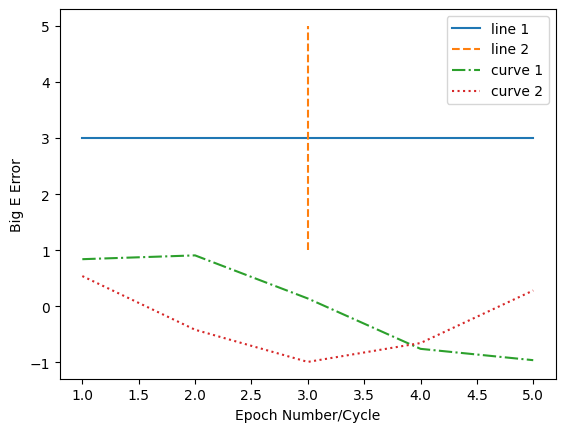

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = [1,2,3,4,5]
y = [3,3,3,3,3]

# plot lines
plt.plot(x, y, label = "line 1", linestyle="-")
plt.xlabel('Epoch Number/Cycle')
plt.ylabel('Big E Error')
plt.plot(y, x, label = "line 2", linestyle="--")
plt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")
plt.plot(x, np.cos(x), label = "curve 2", linestyle=":")
plt.legend()
plt.show()


Training Cycles

In [ ]:
hl=NodeLayer(False,2,2,[ 0.81847679, -1.02873301, 1.38053131, -1.6946236 ],[0,0],False,1)
ol=NodeLayer(True,1,2,[-1.85580087, 2.80301612],[0],True,1)
for i in range(30):
  for k in range(10):
    hl.calc_activation_vector(training[k][0:2])
    print(hl.activation_vector)

    #ol.layer_weights

    #ol.printlayer()

    ol.calc_activation_vector(hl.activation_vector)

    """ALWAYS REMEMBER THAT LAYER.WEIGHTS IS THE INITIAL WEIGHT VECTOR"""

    print(ol.activation_vector)

    ol.calc_delta_vector_ol([training[k][2]])

    print(ol.delta_vector)

    ol.layer_weights

    hl.calc_delta_vector_hl(ol.delta_vector,ol.layer_weights)

    print(hl.delta_vector)

    ol.update_layer_weights()
    hl.update_layer_weights()
    print('End of epoch')
  print('End of Cycle')

Streaming output truncated to the last 5000 lines.
Weight Values for node: [-1.8307334499140242, 2.7313491359997775]
Activity value for node: -0.06692179707653556
[0.4832757919163744]
works
Big E Error= 0.11677774552619939
Node weights: [-1.8307334499140242, 2.7313491359997775]
[-0.12068377615763307]
Wjk Vector: [-1.8307334499140242]
 Delta Value for node in layer0.05522933751519436
Wjk Vector: [2.7313491359997775]
 Delta Value for node in layer-0.0717013243936335
[0.05522933751519436, -0.0717013243936335]
[-1.8916839487100814, 2.692756815316028]
[0.9661512104840771, -1.0037699773032562, 0.2936515012782959, -2.1101169289988757]
End of epoch
Weight Values for node: [0.9661512104840771, -1.0037699773032562]
Activity value for node: 0.9401742958366055
Weight Values for node: [0.2936515012782959, -2.1101169289988757]
Activity value for node: -1.4692339337338862
[0.7191348630186543, 0.1870590801916749]
Weight Values for node: [-1.8916839487100814, 2.692756815316028]
Activity value for node:

In [ ]:
for i in range(10):
  print(training[i][0:2])

[0.9, 0.87]
[1.31, 0.75]
[2.48, 1.14]
[0.41, 1.87]
[2.45, 0.52]
[2.54, 2.97]
[0.07, 0.09]
[1.32, 1.96]
[0.94, 0.34]
[1.75, 2.21]


In [ ]:
hl=NodeLayer(False,2,2,[ 0.81847679, -1.02873301, 1.38053131, -1.6946236 ],[-0.91259343, 1.80953141],False,1)
ol=NodeLayer(True,1,2,[-1.85580087, 2.80301612],[0.5517426],True,1)

In [ ]:
for node in (hl.layer):
  print(node.bias)

-0.91259343
1.80953141


In [ ]:
for node in ol.layer:
  print(node.bias)

0.5517426


In [ ]:
print(ol.layer_weights)
hl.layer_weights

[-1.85580087, 2.80301612]


[0.81847679, -1.02873301, 1.38053131, -1.6946236]

In [ ]:
hl.calc_activation_vector(training[0][0:2])

    #ol.layer_weights

    #ol.printlayer()
print(hl.activation_vector)
ol.calc_activation_vector(hl.activation_vector)

"""ALWAYS REMEMBER THAT LAYER.WEIGHTS IS THE INITIAL WEIGHT VECTOR"""

print(ol.activation_vector)

Weight Values for node: [0.81847679, -1.02873301]
Activity value for node: -1.0709620377000002
Weight Values for node: [1.38053131, -1.6946236]
Activity value for node: 1.5776870570000001
[0.25522017425841703, 0.8288766993817265]
Weight Values for node: [-1.85580087, 2.80301612]
Activity value for node: 2.4014595284290516
[0.9169385321569871]


In [ ]:
ol.calc_big_error([training[0][2]])

Big E Error= 0.003449603720117936


Testing/ROC Calculation One Layer


In [ ]:
# a;sdkjf;alksdjf;aklsdjf;klasdjf;kasldjf
def experimental(testing,threshold,hiddenlayer,outputlayer):
  activations=[]
  for i in range(10):


    hiddenlayer.calc_activation_vector(testing[i][0:2])

    #ol.layer_weights

    #ol.printlayer()

    outputlayer.calc_activation_vector(hl.activation_vector)

    """ALWAYS REMEMBER THAT LAYER.WEIGHTS IS THE INITIAL WEIGHT VECTOR"""

    print(ol.activation_vector)
    activation_val=ol.activation_vector[0]
    if activation_val<threshold:
      activations.append(0)
    elif activation_val>=threshold:
      activations.append(1)
  print(activations)
  return activations
def ROC(experiment,actual):
  FP=0
  TP=0
  FN=0
  TN=0
  for i in range(len(actual)):
    if actual[i]==1 and experiment[i]==1:
      TP+=1
    elif actual[i]==1 and experiment[i]==0:
      FN+=1
    elif actual[i]==0 and experiment[i]==1:
      FP+=1
    elif actual[i]==0 and experiment[i]==0:
      TN+=1

  sensitivity=TP/(TP+FN)
  specificity=TN/(TN+FP)
  return sensitivity,specificity

In [ ]:
actual=[]
for i in range(10):
  actual.append(training[i][2])

activations=experimental(training,0.29,hl,ol)
print(actual)
sens,spec=ROC(activations,actual)

Weight Values for node: [0.81847679, -1.02873301]
Activity value for node: -1.0709620377000002
Weight Values for node: [1.38053131, -1.6946236]
Activity value for node: 1.5776870570000001
Weight Values for node: [-1.85580087, 2.80301612]
Activity value for node: 2.4014595284290516
[0.9169385321569871]
Weight Values for node: [0.81847679, -1.02873301]
Activity value for node: -0.6119385926
Weight Values for node: [1.38053131, -1.6946236]
Activity value for node: 2.3470597261000004
Weight Values for node: [-1.85580087, 2.80301612]
Activity value for node: 2.4575247408429455
[0.921109982082664]
Weight Values for node: [0.81847679, -1.02873301]
Activity value for node: -0.055526622200000375
Weight Values for node: [1.38053131, -1.6946236]
Activity value for node: 3.3013781548000005
Weight Values for node: [-1.85580087, 2.80301612]
Activity value for node: 2.3530390780106747
[0.9131754867079032]
Weight Values for node: [0.81847679, -1.02873301]
Activity value for node: -2.5007486748000005
W

In [ ]:
print(sens,spec)

1.0 0.0


In [ ]:
print(ol.layer_weights)

[-1.85580087, 2.80301612]


In [ ]:
print(hl.layer_weights)

[0.81847679, -1.02873301, 1.38053131, -1.6946236]


In [ ]:
print(ol.bigerror)

0.003449603720117936
